In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
results = pd.read_csv('results_weka.csv')
expirmenets = pd.read_csv('expirement.csv')

### Plot 1

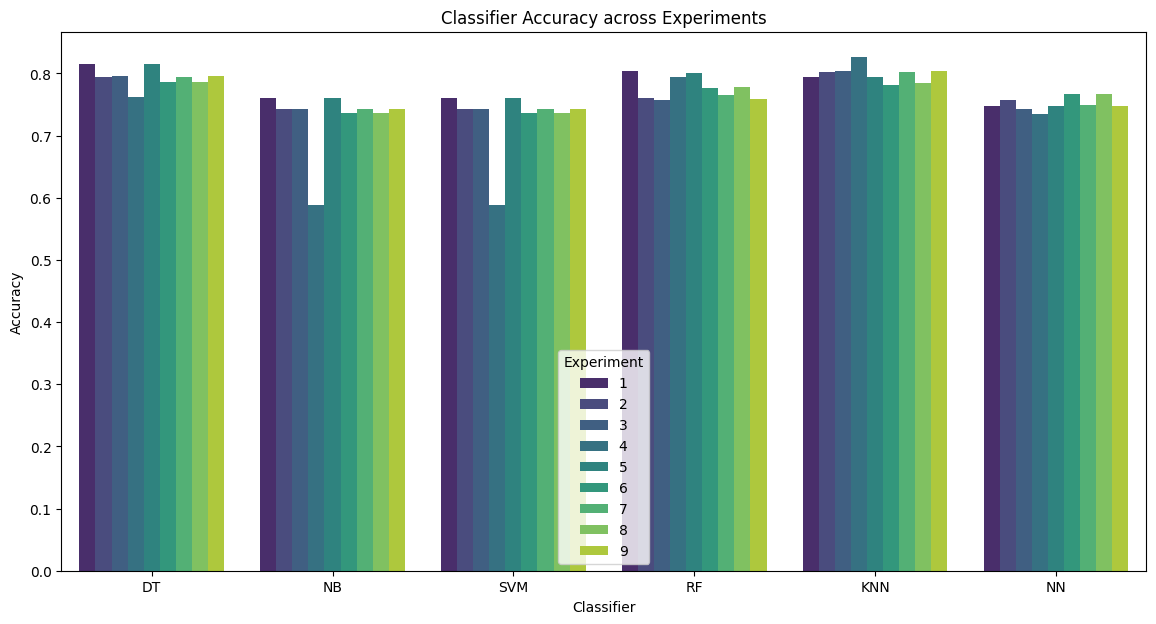

In [3]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Classifier', y='Accuracy', hue='Expierement', data=results, palette='viridis')
plt.title('Classifier Accuracy across Experiments')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.legend(title='Experiment')
plt.show()

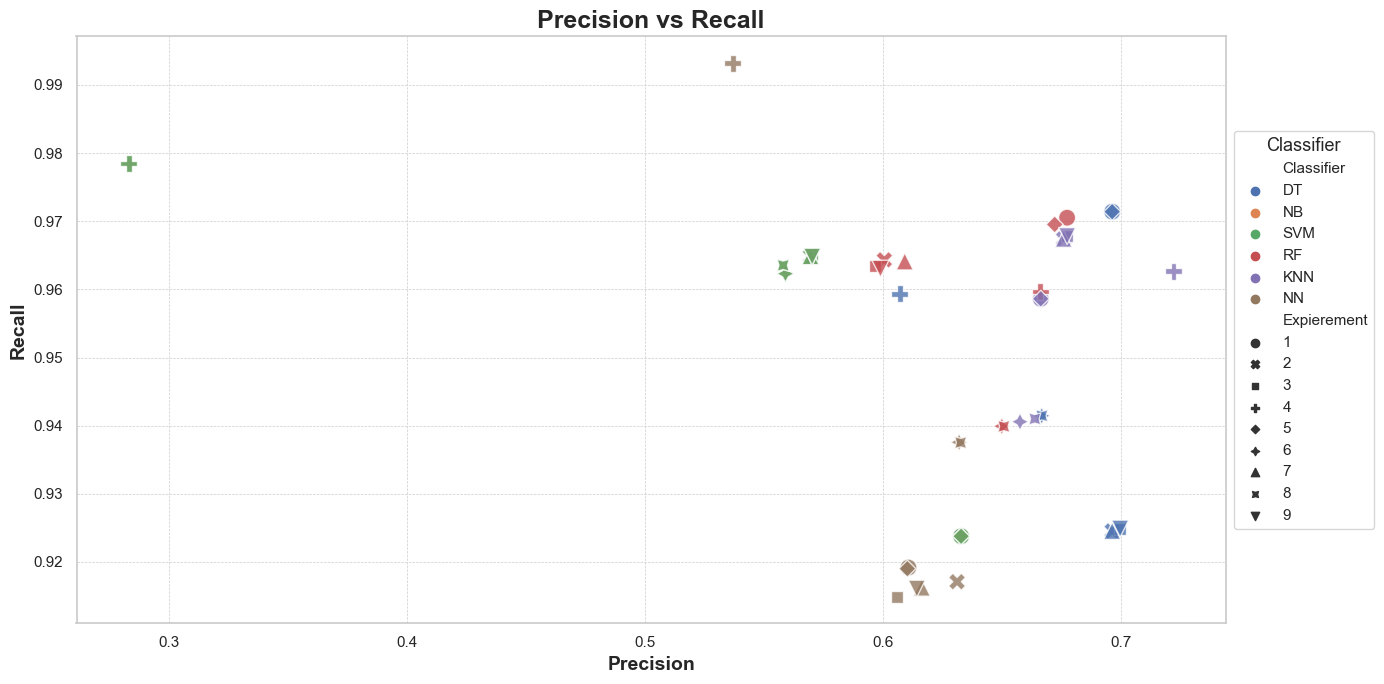

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
scatter = sns.scatterplot(
    x='Precision', 
    y='Recall', 
    hue='Classifier', 
    style='Expierement', 
    data=results, 
    palette='deep', 
    s=150, 
    alpha=0.8 
)


scatter.set_title('Precision vs Recall', fontsize=18, weight='bold')
scatter.set_xlabel('Precision', fontsize=14, weight='bold')
scatter.set_ylabel('Recall', fontsize=14, weight='bold')


plt.legend(title='Classifier', title_fontsize='13', fontsize='11', loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, framealpha=0.8)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.tight_layout()


plt.show()


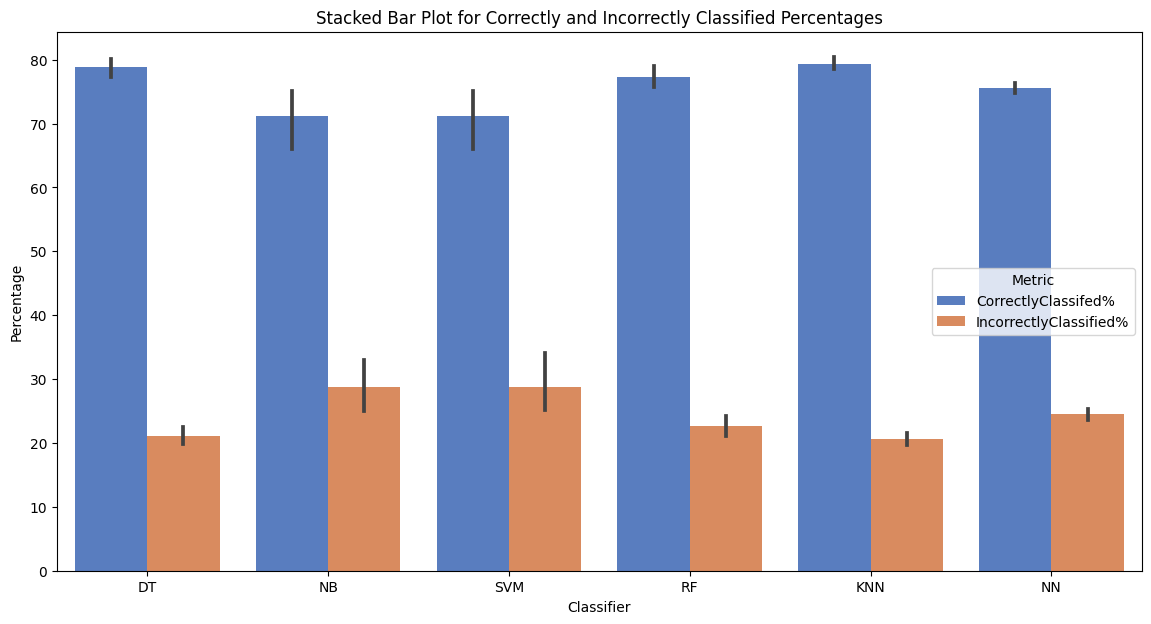

In [10]:
correct_incorrect_data = results[['Expierement', 'Classifier', 'CorrectlyClassifed%', 'IncorrectlyClassified%']]
correct_incorrect_data = correct_incorrect_data.melt(id_vars=['Expierement', 'Classifier'], value_vars=['CorrectlyClassifed%', 'IncorrectlyClassified%'], var_name='Metric', value_name='Percentage')
plt.figure(figsize=(14, 7))
sns.barplot(x='Classifier', y='Percentage', hue='Metric', data=correct_incorrect_data, palette='muted')
plt.title('Stacked Bar Plot for Correctly and Incorrectly Classified Percentages')
plt.xlabel('Classifier')
plt.ylabel('Percentage')
plt.show()

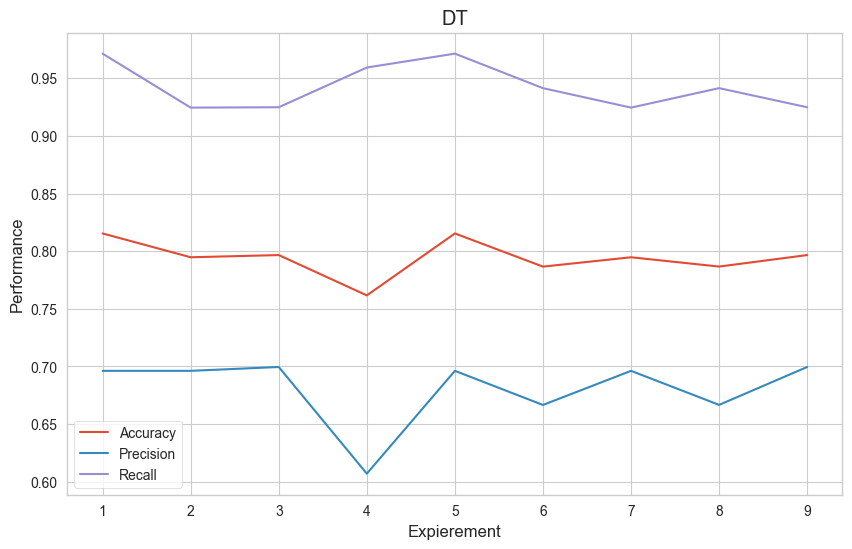

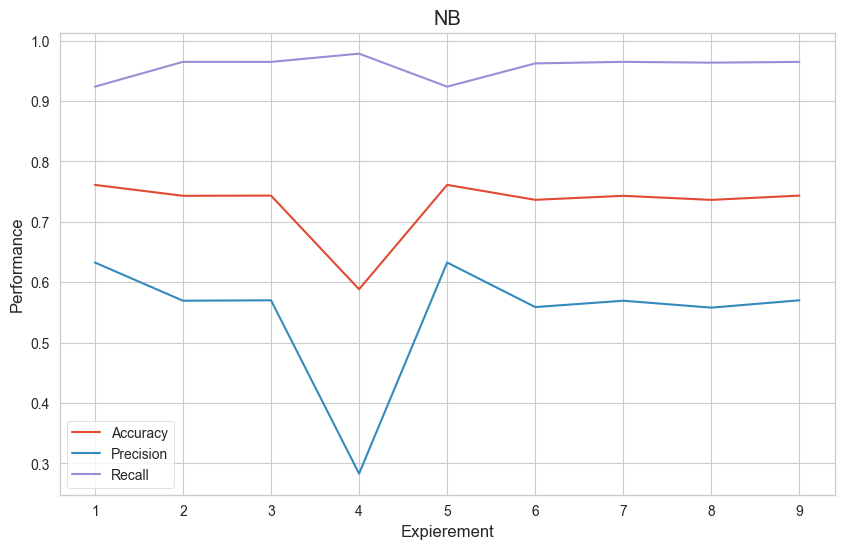

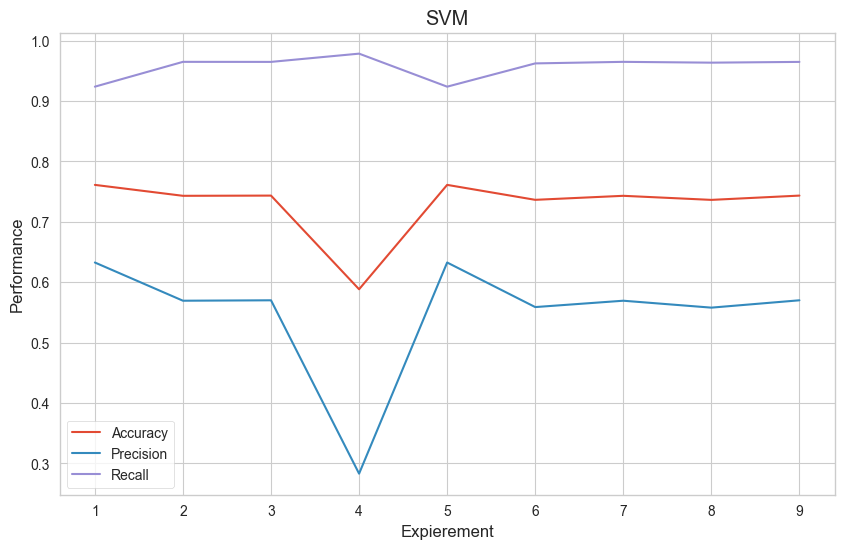

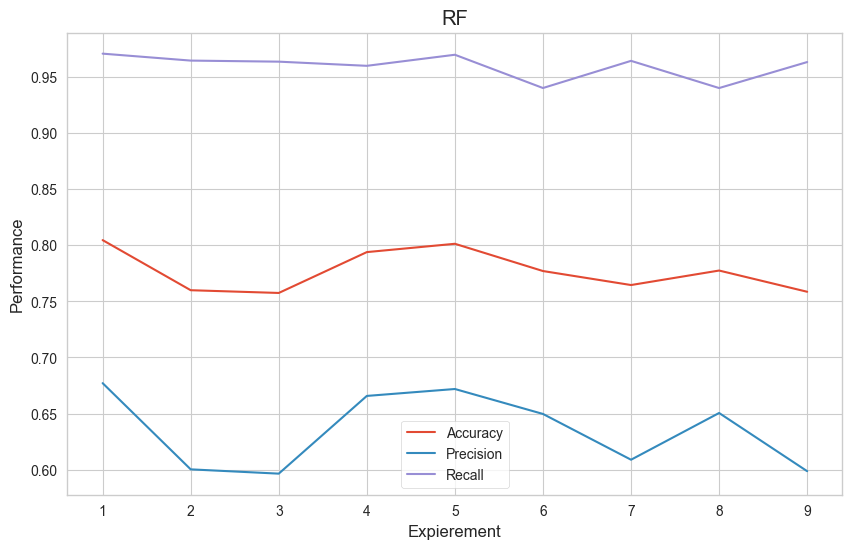

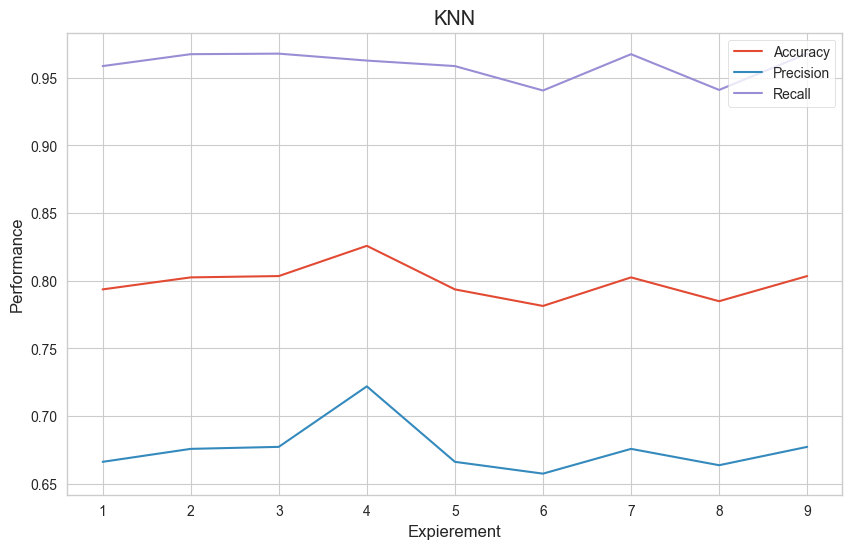

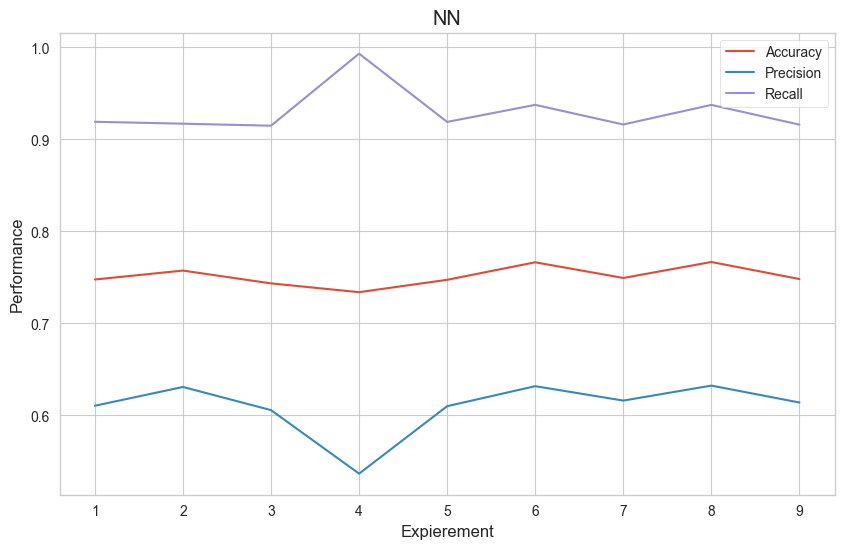

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings


results_df = pd.read_csv('results_weka.csv')
config_df = pd.read_csv('expirement.csv')

warnings.simplefilter(action='ignore', category=FutureWarning)

merged_df = pd.merge(results_df, config_df, on='Expierement')


classifiers = merged_df['Classifier'].unique()


sns.set_style('whitegrid')


save_dir = 'plots'


if not os.path.exists(save_dir):
    os.makedirs(save_dir)


for classifier in classifiers:
    
    classifier_data = merged_df[merged_df['Classifier'] == classifier]

   
    plt.figure(figsize=(10, 6))
    plt.title(classifier)
    plt.xlabel('Expierement')
    plt.ylabel('Performance')

   
    sns.lineplot(x=classifier_data['Expierement'], y=classifier_data['Accuracy'], label='Accuracy')
    sns.lineplot(x=classifier_data['Expierement'], y=classifier_data['Precision'], label='Precision')
    sns.lineplot(x=classifier_data['Expierement'], y=classifier_data['Recall'], label='Recall')

   
    plt.legend()

    
    #plt.savefig(os.path.join(save_dir, f'{classifier}_performance.png'))

  
    plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_26172\4160560344.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Classifier', y='Accuracy', data=results, ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_26172\4160560344.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Classifier', y='Precision', data=results, ci=None)


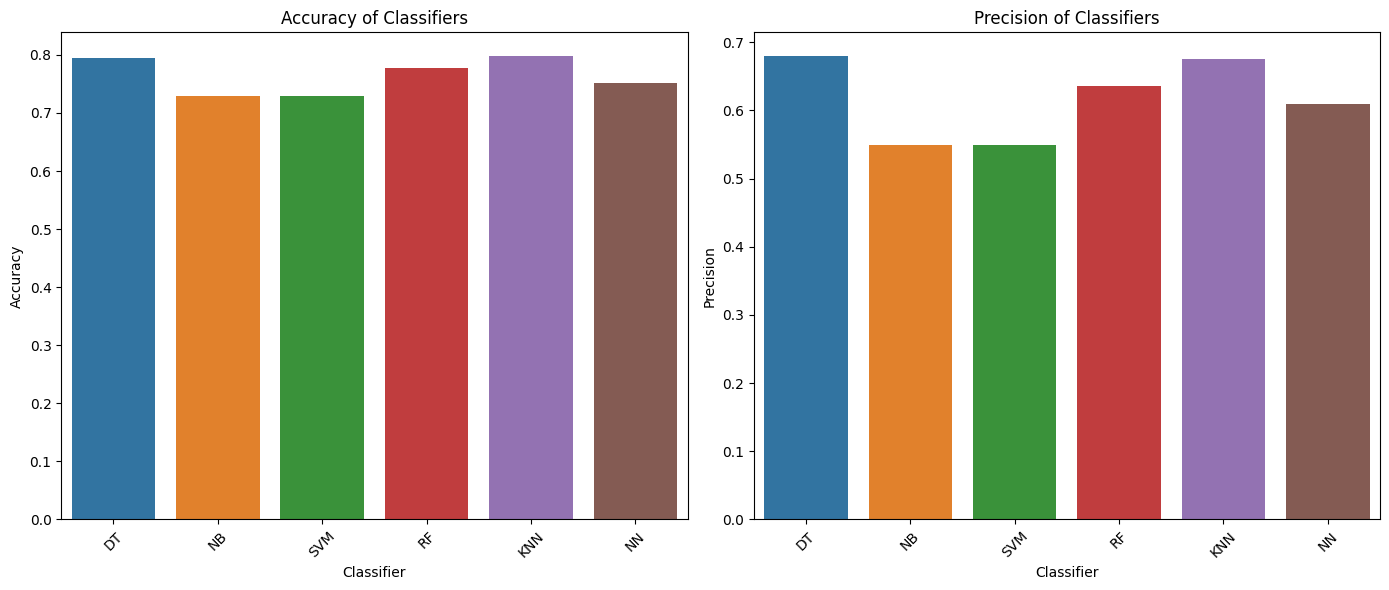

In [9]:
# Plotting Accuracy and Precision
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Classifier', y='Accuracy', data=results, ci=None)
plt.title('Accuracy of Classifiers')
plt.xticks(rotation=45)

# Precision Plot
plt.subplot(1, 2, 2)
sns.barplot(x='Classifier', y='Precision', data=results, ci=None)
plt.title('Precision of Classifiers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_26172\2211189209.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FeatureSelection', y='Accuracy', data=merged_df, ci=None)
C:\Users\pc\AppData\Local\Temp\ipykernel_26172\2211189209.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PreProcessing', y='Accuracy', data=merged_df, ci=None)


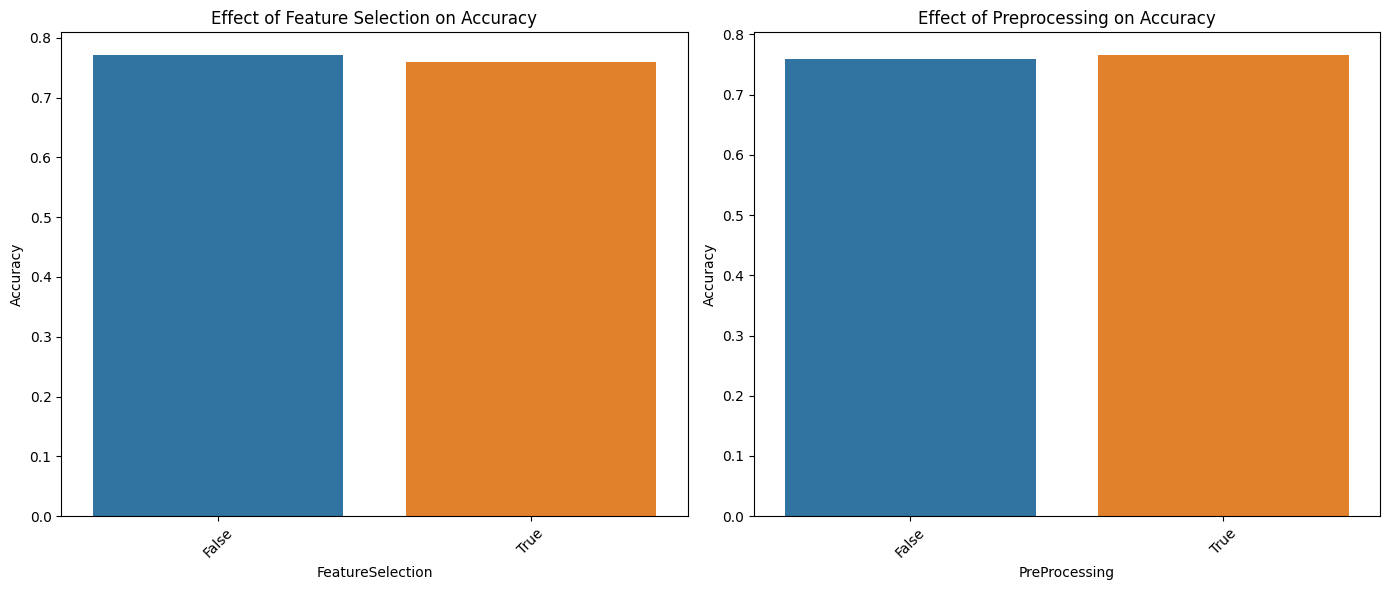

In [10]:
merged_df = pd.merge(results, expirmenets, on='Expierement')

# Plotting Effect of Feature Selection and Preprocessing
plt.figure(figsize=(14, 6))

# Accuracy by Feature Selection
plt.subplot(1, 2, 1)
sns.barplot(x='FeatureSelection', y='Accuracy', data=merged_df, ci=None)
plt.title('Effect of Feature Selection on Accuracy')
plt.xticks(rotation=45)

# Accuracy by Preprocessing
plt.subplot(1, 2, 2)
sns.barplot(x='PreProcessing', y='Accuracy', data=merged_df, ci=None)
plt.title('Effect of Preprocessing on Accuracy')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

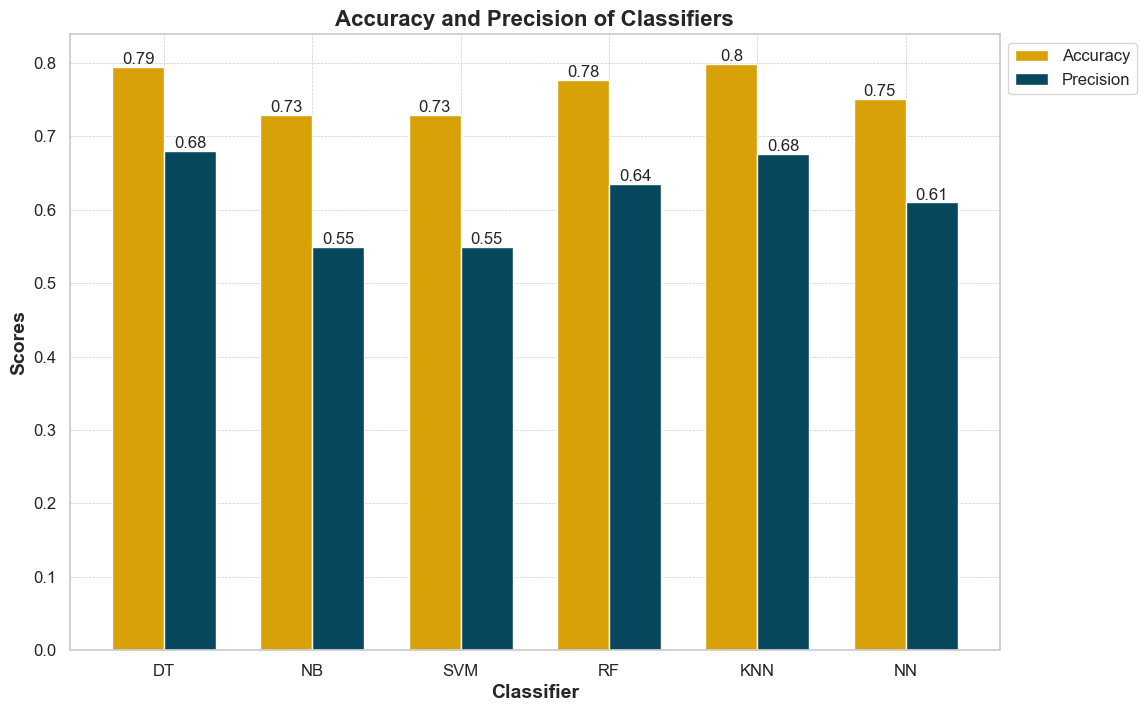

In [22]:
# Extract unique classifiers
classifiers = results['Classifier'].unique()

# Calculate the mean accuracy and precision for each classifier
accuracy = []
precision = []

for classifier in classifiers:
    classifier_data = results[results['Classifier'] == classifier]
    accuracy.append(classifier_data['Accuracy'].mean())
    precision.append(classifier_data['Precision'].mean())

# Set a modern style
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))

# Define custom colors
accuracy_color = '#D7A107'  # Blue
precision_color = '#07485E'  # Orange


# Bar width
bar_width = 0.35

# X positions for the groups
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]

# Create the bars
bars1 = plt.bar(r1, accuracy, color=accuracy_color, width=bar_width, label='Accuracy')
bars2 = plt.bar(r2, precision, color=precision_color, width=bar_width, label='Precision')

# Add value labels
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)



# Add labels and title
plt.xlabel('Classifier', fontsize=14, fontweight='bold')
plt.ylabel('Scores', fontsize=14, fontweight='bold')
plt.title('Accuracy and Precision of Classifiers', fontsize=16, fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(classifiers))], classifiers, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

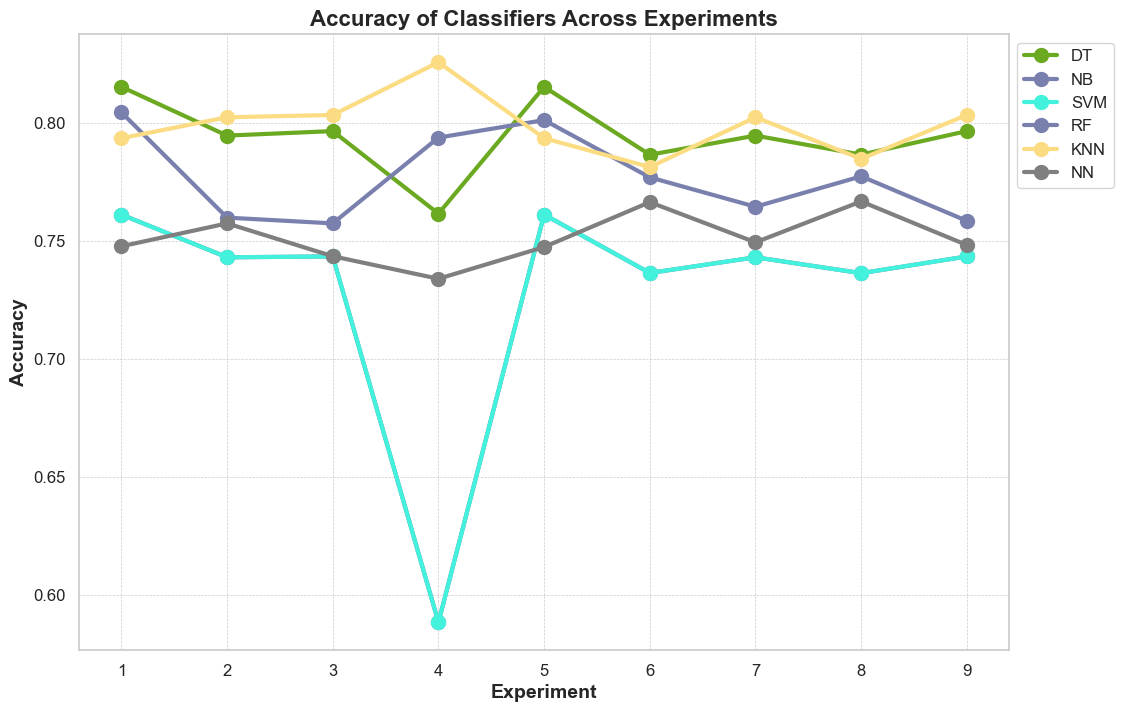

In [29]:
# Extract unique classifiers
classifiers = results['Classifier'].unique()

# Extract unique experiments
experiments = results['Expierement'].unique()

# Define custom colors for each classifier
classifier_colors = {
    'DT': '#6BA921',
    'NB': '#7A80AE',
    'SVM': '#42F2DD',
    'RF': '#7A80AE',
    'KNN': '#FBDC83',
    'NN': '#7F7F7F'
}

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot accuracy for each classifier
for classifier in classifiers:
    classifier_data = results[results['Classifier'] == classifier]
    accuracy = classifier_data['Accuracy']
    plt.plot(experiments, accuracy, marker='o', linestyle='-', linewidth=3, markersize=10, label=classifier, color=classifier_colors[classifier])

# Add labels and title
plt.xlabel('Experiment', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Accuracy of Classifiers Across Experiments', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

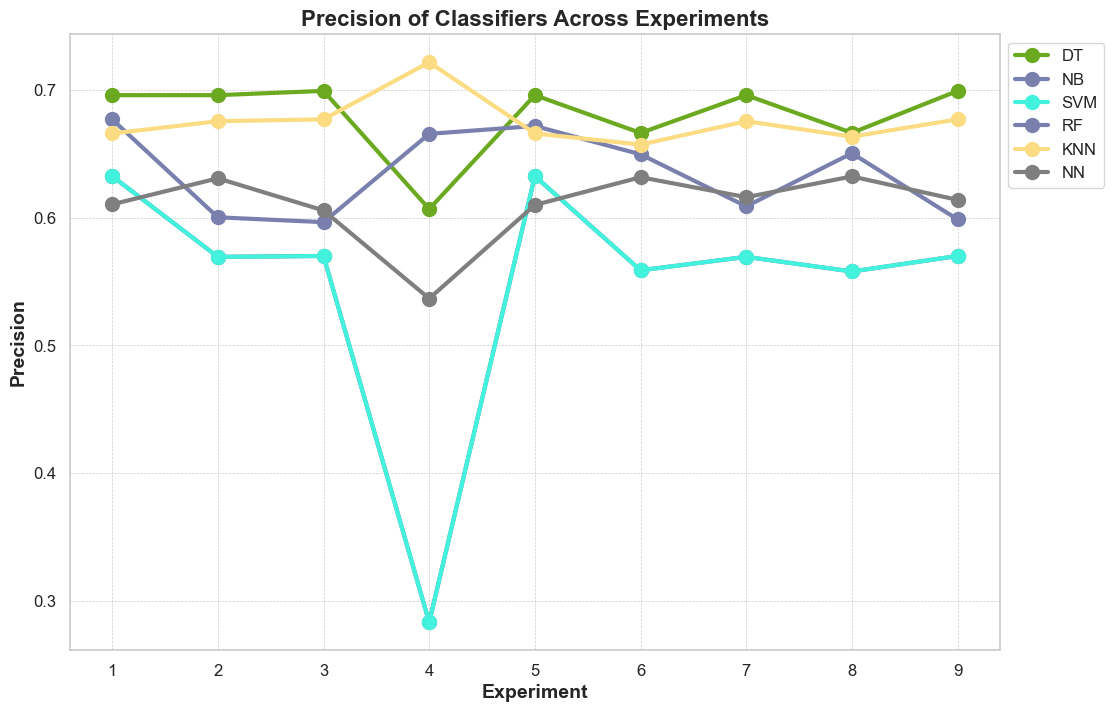

In [30]:
# Extract unique classifiers
classifiers = results['Classifier'].unique()

# Extract unique experiments
experiments = results['Expierement'].unique()

# Define custom colors for each classifier
classifier_colors = {
    'DT': '#6BA921',
    'NB': '#6BA921',
    'SVM': '#42F2DD',
    'RF': '#7A80AE',
    'KNN': '#FBDC83',
    'NN': '#7F7F7F'
}

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot accuracy for each classifier
for classifier in classifiers:
    classifier_data = results[results['Classifier'] == classifier]
    accuracy = classifier_data['Precision']
    plt.plot(experiments, accuracy, marker='o', linestyle='-', linewidth=3, markersize=10, label=classifier, color=classifier_colors[classifier])

# Add labels and title
plt.xlabel('Experiment', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision of Classifiers Across Experiments', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')
# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

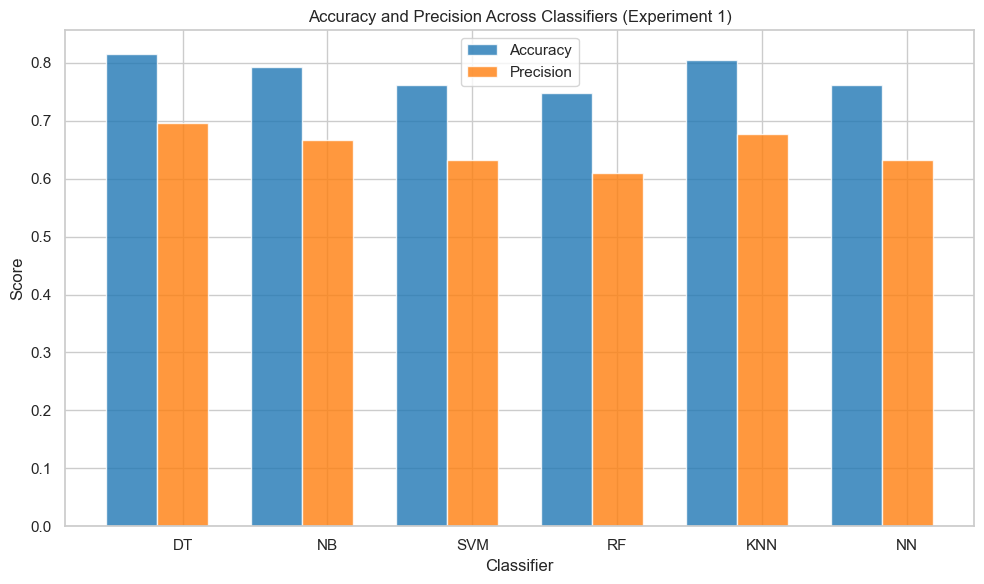

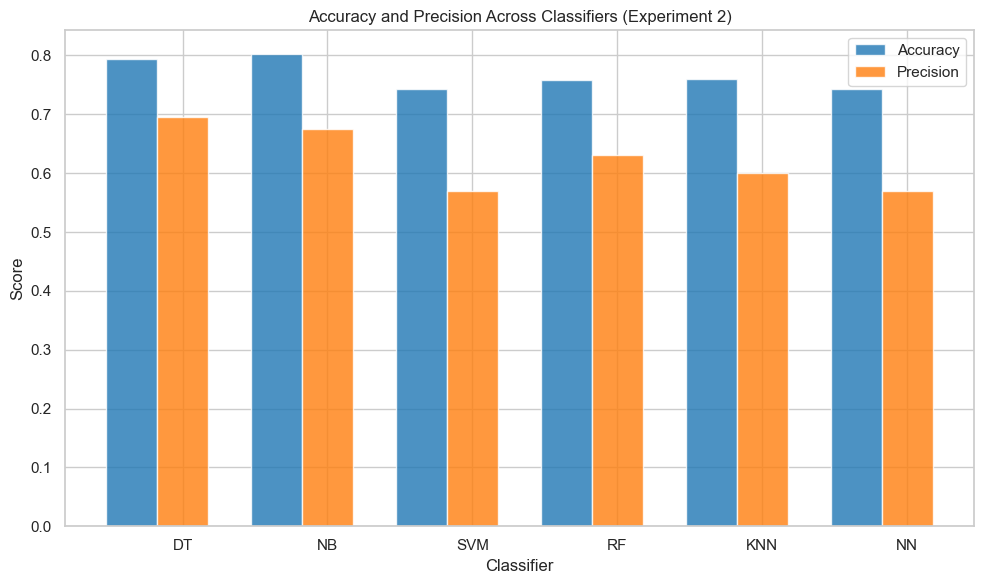

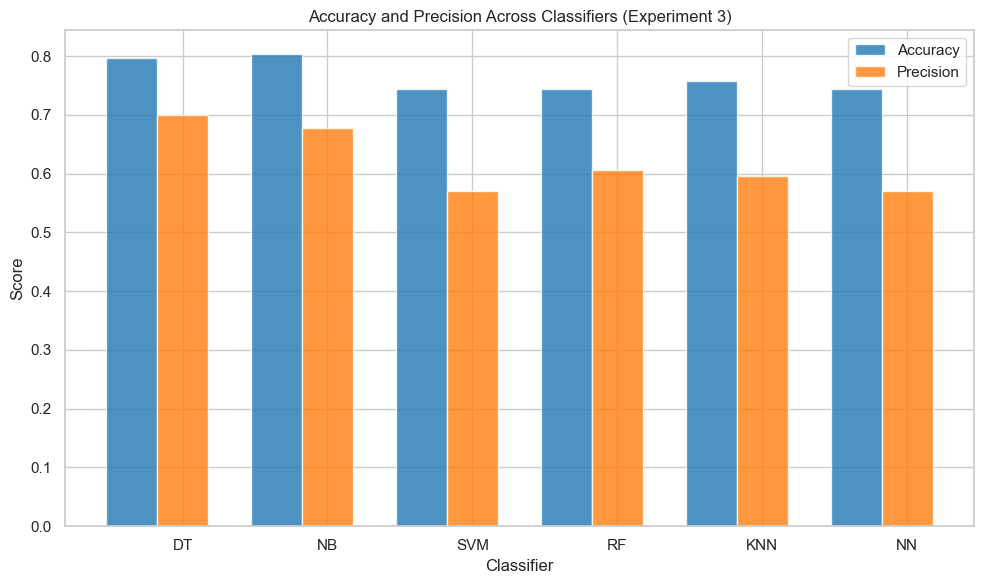

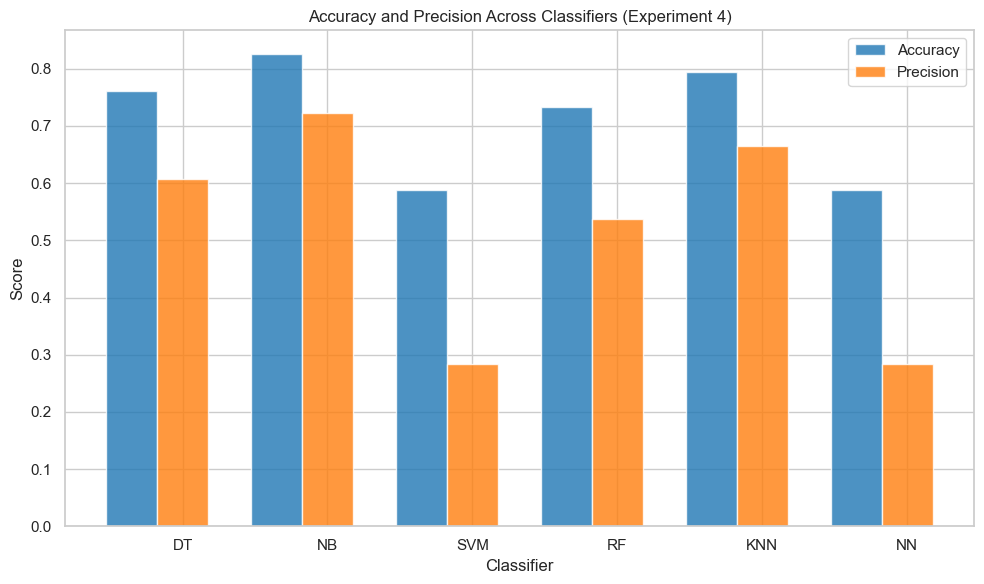

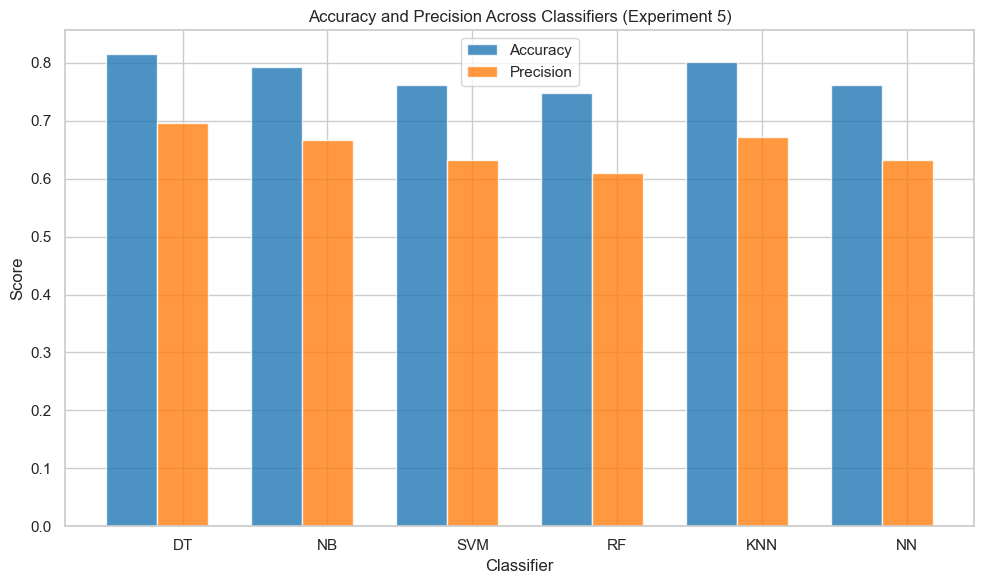

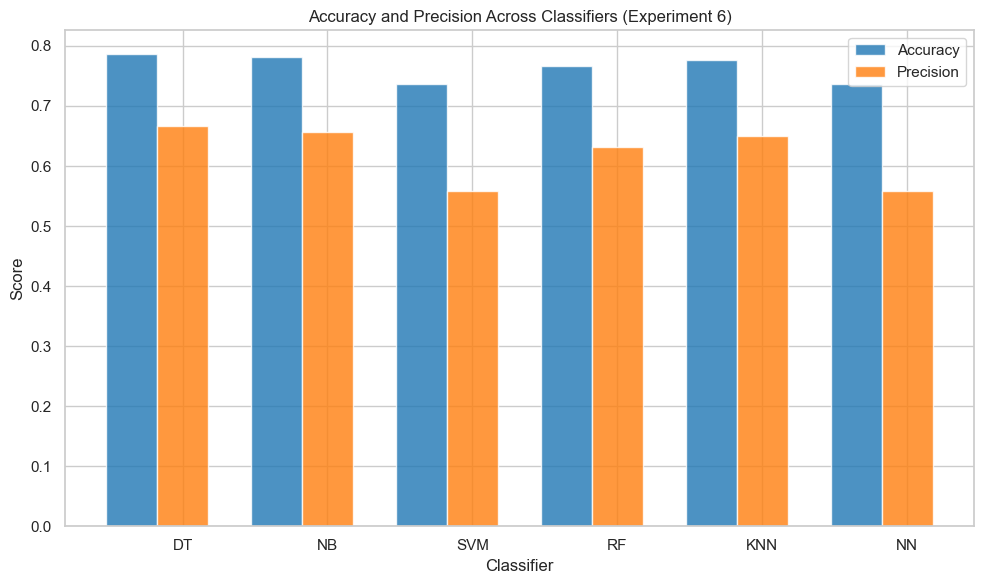

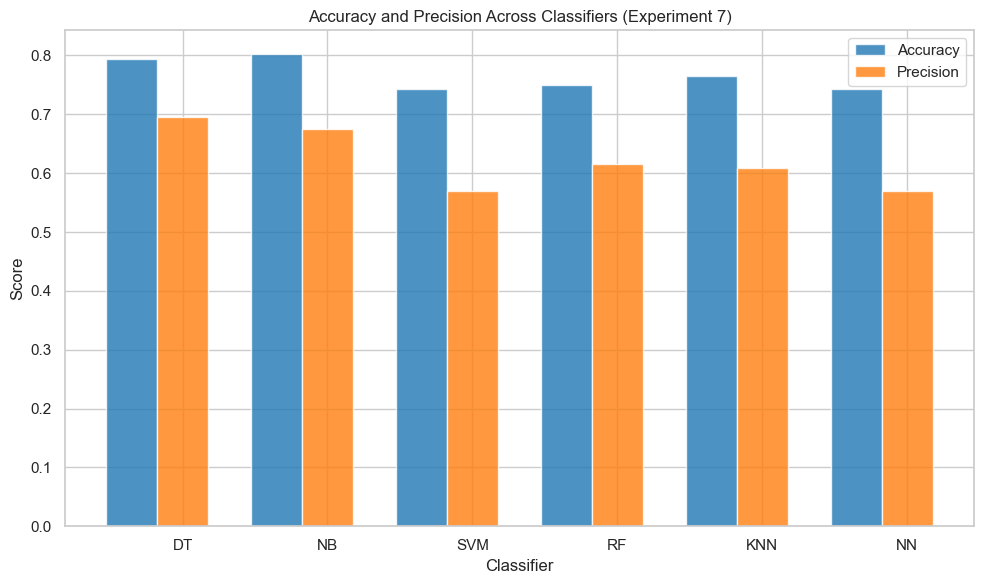

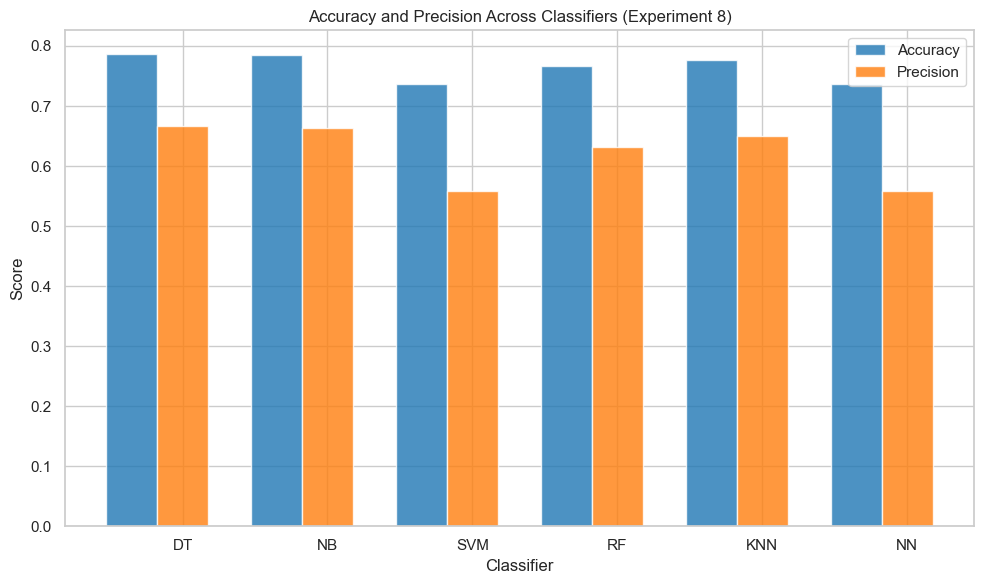

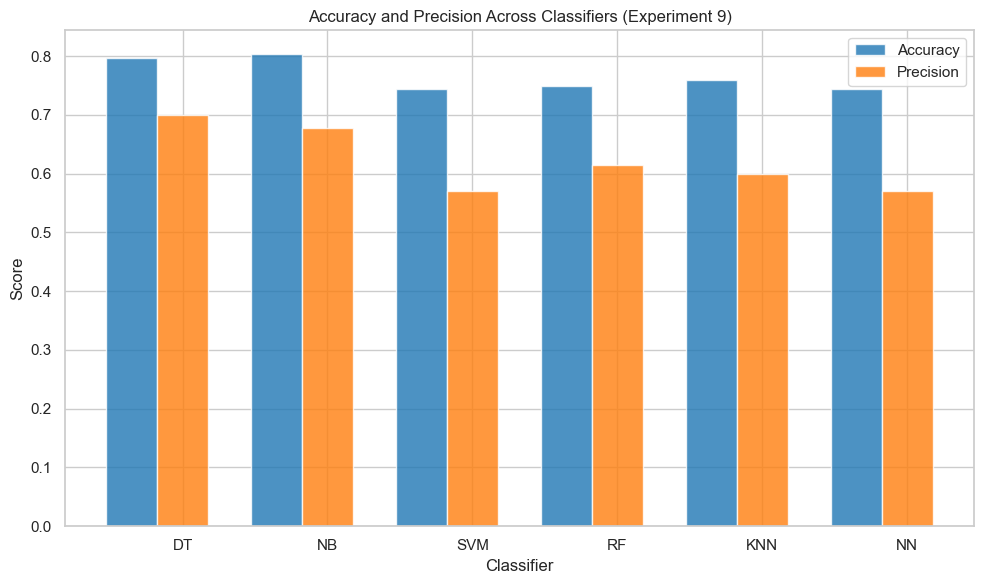

In [35]:
# Extract unique experiments
experiments = results['Expierement'].unique()

# Define custom colors for accuracy and precision
colors = ['#1f77b4', '#ff7f0e']  # Blue for accuracy, Orange for precision

# Loop through each experiment
for experiment in experiments:
    # Filter data for the current experiment
    experiment_data = results[results['Expierement'] == experiment]

    # Get unique classifiers
    classifiers = experiment_data['Classifier'].unique()

    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Plot accuracy and precision for each classifier
    bar_width = 0.35
    index = np.arange(len(classifiers))
    opacity = 0.8

    for i, metric in enumerate(['Accuracy', 'Precision']):
        plt.bar(index + i * bar_width, experiment_data.groupby('Classifier')[metric].mean(), bar_width,
                alpha=opacity, color=colors[i], label=metric)

    plt.xlabel('Classifier')
    plt.ylabel('Score')
    plt.title(f'Accuracy and Precision Across Classifiers (Experiment {experiment})')
    plt.xticks(index + bar_width, classifiers)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/KDDTrain+.csv')

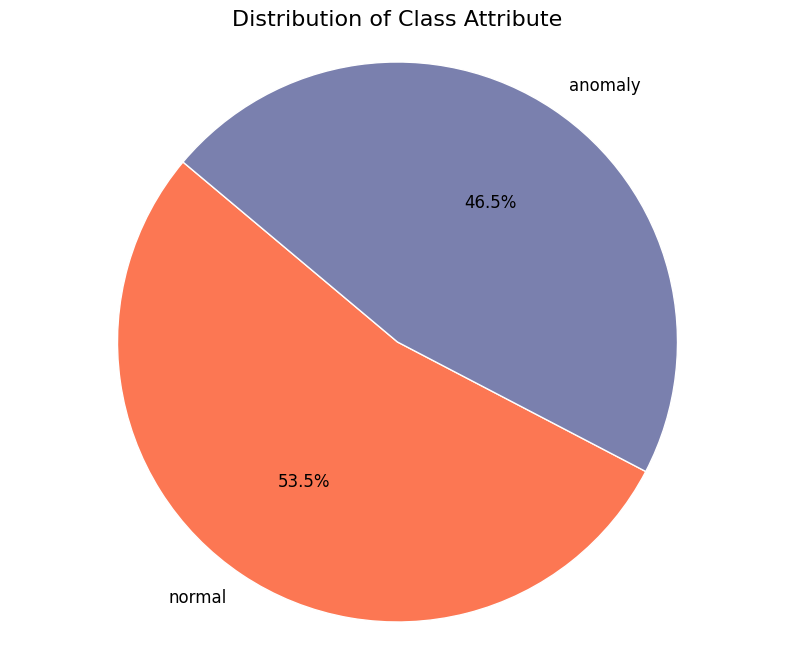

In [5]:
# Extract the 'class' attribute
class_counts = data['class'].value_counts()

# Define custom colors
colors = ['#FC7753','#7A80AE','#66D7D1','#403D58','#DBD56E','#ECA72C','#5C6D70','#3C6E71']

# Create a pie chart with a modern style
plt.figure(figsize=(10, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12})
plt.title('Distribution of Class Attribute', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

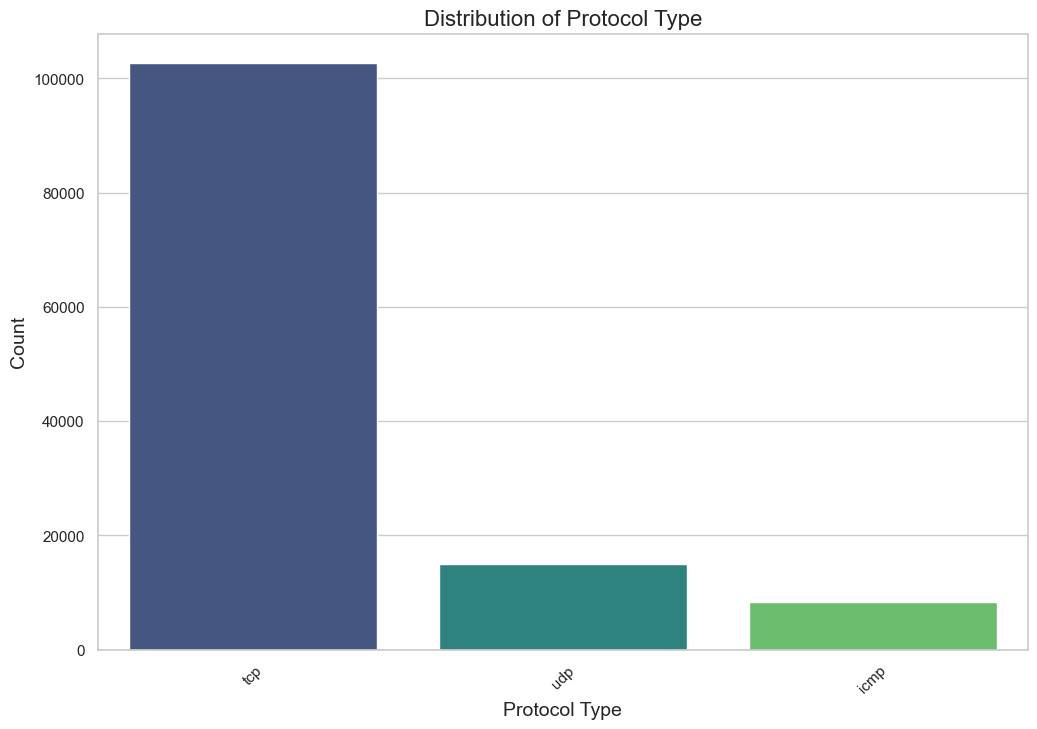

In [22]:
# Extract the 'protocol-type' attribute
protocol_counts = data['protocol_type'].value_counts()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=protocol_counts.index, y=protocol_counts.values, palette='viridis')
plt.title('Distribution of Protocol Type', fontsize=16)
plt.xlabel('Protocol Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

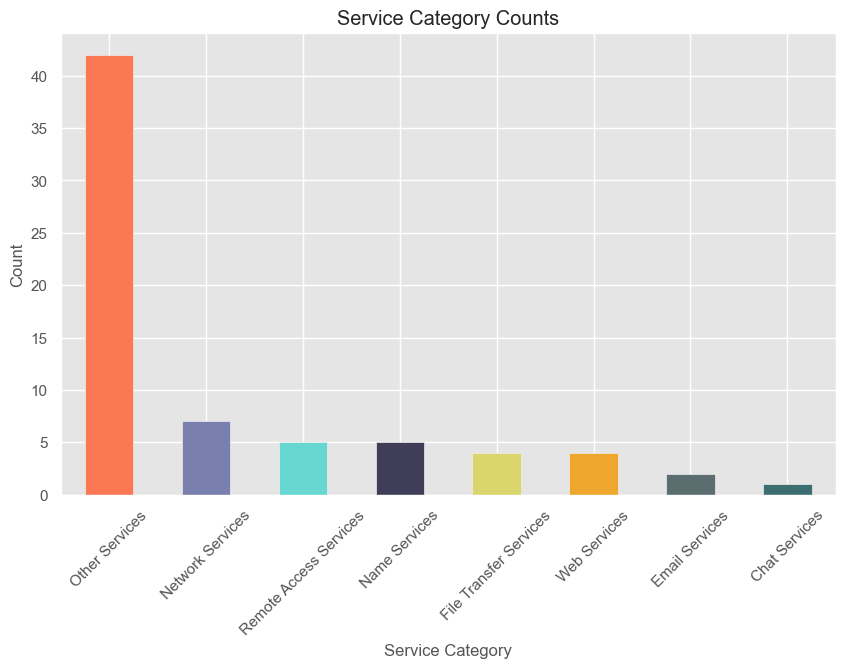

In [41]:
# Your unique service values
services = ['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest']

# Categorization function
def categorize_service(service):
    if service in ['ftp_data', 'efs', 'ftp', 'tftp_u']:
        return 'File Transfer Services'
    elif service in ['smtp', 'imap4']:
        return 'Email Services'
    elif service in ['http', 'http_443', 'http_8001', 'http_2784']:
        return 'Web Services'
    elif service in ['remote_job', 'telnet', 'rlogin', 'ssh', 'klogin', 'kshell']:
        return 'Remote Access Services'
    elif service in ['name', 'netbios_ns', 'domain', 'domain_u', 'hostnames']:
        return 'Name Services'
    elif service in ['netbios_dgm', 'netbios_ssn', 'netstat', 'bgp', 'sunrpc', 'vmnet', 'mtp']:
        return 'Network Services'
    elif service == 'IRC':
        return 'Chat Services'
    else:
        return 'Other Services'

# Apply categorization
df = pd.DataFrame(services, columns=['service'])
df['category'] = df['service'].apply(categorize_service)

# Plot
plt.figure(figsize=(10,6))
df['category'].value_counts().plot(kind='bar' , color=colors)
plt.title('Service Category Counts')
plt.xlabel('Service Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Services categorized by functionality
service_categories = {
    'File Transfer': ['ftp', 'ftp_data', 'tftp_u'],
    'Web Services': ['http', 'http_443', 'http_8001', 'http_2784', 'gopher'],
    'Remote Access': ['ssh', 'telnet', 'rlogin', 'klogin', 'kshell', 'login', 'exec'],
    'Email': ['smtp', 'pop_3', 'pop_2', 'imap4'],
    'Directory Services': ['ldap', 'whois', 'domain_u', 'domain'],
    'Database and Directory Services': ['sql_net', 'csnet_ns', 'Z39_50'],
    'Time Services': ['ntp_u', 'time', 'daytime'],
    'Network Services': ['netbios_ns', 'netbios_dgm', 'netbios_ssn', 'sunrpc', 'link', 'netstat', 'IRC'],
    'Monitoring and Management': ['systat', 'pm_dump', 'red_i'],
    'Other/Miscellaneous': ['other', 'private', 'name', 'finger', 'supdup', 'uucp_path', 'urp_i', 'auth', 'bgp',
                            'ecr_i', 'vmnet', 'efs', 'iso_tsap', 'echo', 'hostnames', 'discard', 'courier', 'ctf',
                            'shell', 'printer', 'tim_i', 'urh_i', 'aol', 'harvest']
}

# Count the number of services in each category
category_counts = {category: sum(data['service'] in category_services for services in service_categories.values()) 
                   for category, category_services in service_categories.items()}

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.title('Distribution of Services by Functionality', fontsize=16)
plt.xlabel('Functionality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

C:\Users\patri\AppData\Local\Temp\ipykernel_9148\1581376587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='flag', order=data['flag'].value_counts().index, palette=colors)
C:\Users\patri\AppData\Local\Temp\ipykernel_9148\1581376587.py:8: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, y='flag', order=data['flag'].value_counts().index, palette=colors)


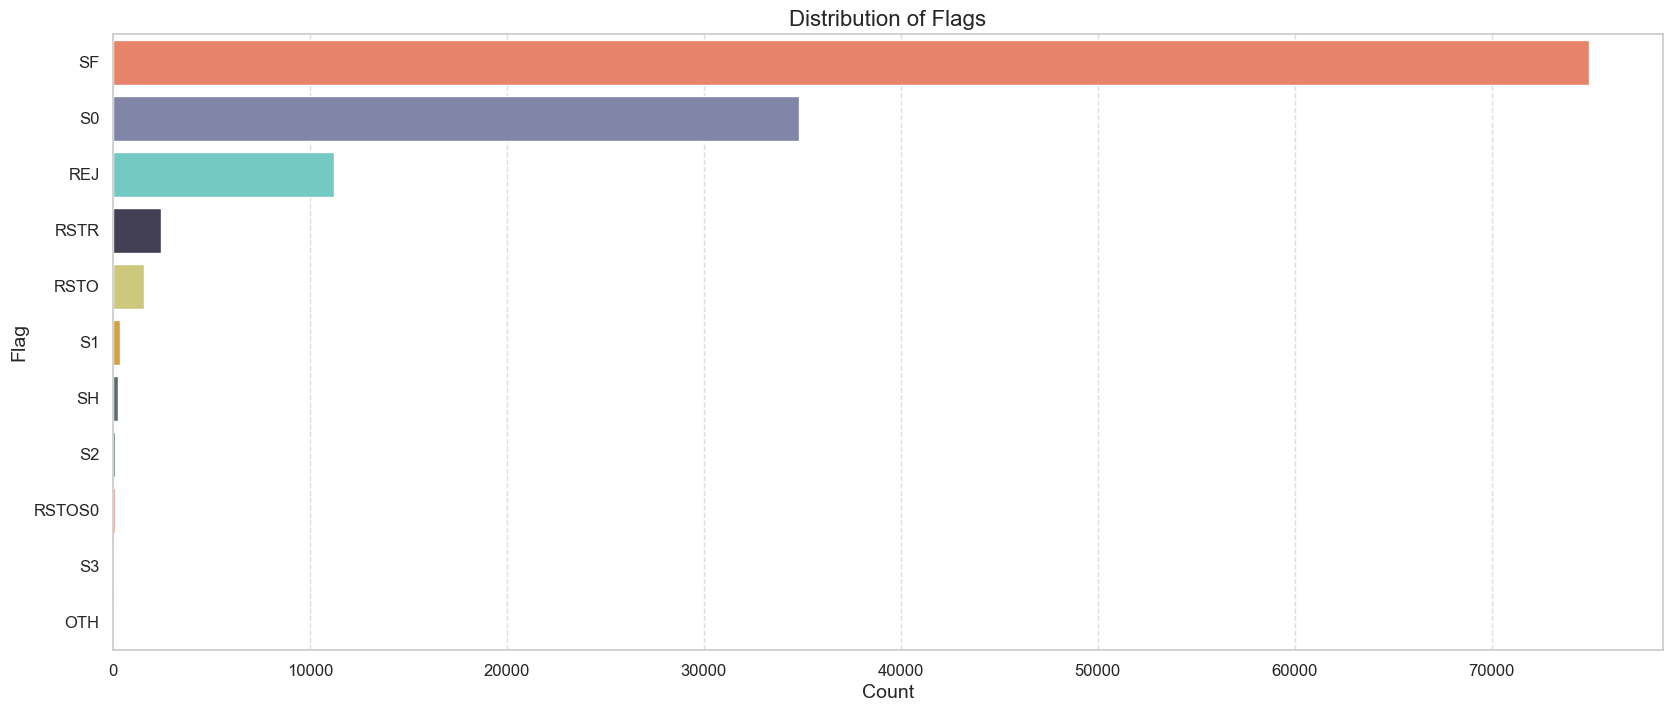

In [22]:
# Assuming data is loaded into a pandas DataFrame called data

# Define custom colors
colors = ['#FC7753', '#7A80AE', '#66D7D1', '#403D58', '#DBD56E', '#ECA72C', '#5C6D70', '#3C6E71']

# Plotting the dot plot for flag with custom colors
plt.figure(figsize=(20, 8))
sns.countplot(data=data, y='flag', order=data['flag'].value_counts().index, palette=colors)
plt.title('Distribution of Flags', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Flag', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


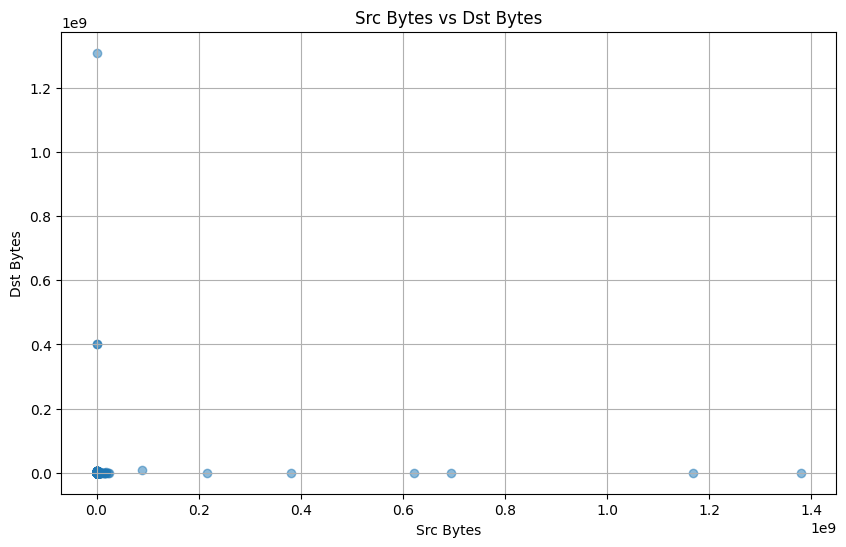

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data is loaded into a pandas DataFrame called df

# Plotting the scatter plot for Src Bytes vs Dst Bytes
plt.figure(figsize=(10, 6))
plt.scatter(data['src_bytes'], data['dst_bytes'], alpha=0.5)
plt.title('Src Bytes vs Dst Bytes')
plt.xlabel('Src Bytes')
plt.ylabel('Dst Bytes')
plt.grid(True)
plt.show()


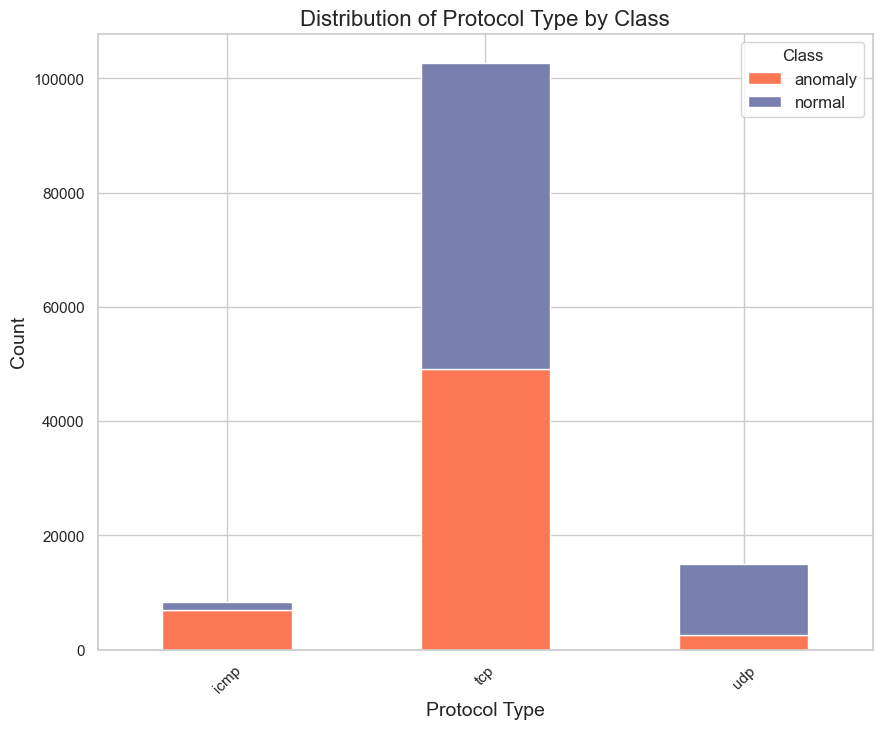

In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Construct file path
file_path = os.path.join('data', 'KDDTrain+.csv')

data = pd.read_csv(file_path)

# Extract the 'protocol-type' and 'class' attributes
protocol_class_counts = data.groupby(['protocol_type', 'class']).size().unstack(fill_value=0)



# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 8))
protocol_class_counts.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.title('Distribution of Protocol Type by Class', fontsize=16)
plt.xlabel('Protocol Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Class', loc='best', fontsize=12)
plt.show()